In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from datetime import datetime, timedelta

## Задача:
Провести анализ прибыльности авиарейсов из Анапы зимой 2017 года

In [84]:
#Загружаем датасет:
data = pd.read_csv('sql_project.csv')

In [85]:
'''Предобработка'''

#Создаём словарь для замены кода самолёта на его расход топлива:
aircraft_dict = {'SU9' : 1700,
                 '733' : 2600}

#Переведём дату вылета в формат datetime:
data['actual_departure'] = pd.to_datetime(data.actual_departure)

#Создаём словарь для замены номера месяца на стоимоть топлива:
price_dict = {1 : 41435,
              2 : 39553,
              12 : 47101}

#Создаём словарь для присвоения названия номеру дня недели
day_dict = {0 : 'понедельник',
            1 : 'вторник',
            2 : 'среда',
            3 : 'четверг',
            4 : 'пятница',
            5 : 'суббота',
            6 : 'воскресение'}


In [86]:
#Посмотрим на наши данные:
display(data.head(10))
data.info()

,flight_id,flight_no,departure_airport,arrival_airport,actual_departure,flight_duration,aircraft_code,model,business_qty,comfort_qty,economy_qty,econom_tickets,econom_amount,comfort_tickets,comfort_amount,business_tickets,business_amount
0,136661,PG0480,AAQ,EGO,2017-01-01 09:27:00+00:00,0.833333,SU9,Sukhoi Superjet-100,12,NaN,85,84.0,532200.0,NaN,NaN,12.0,226800.0
1,136936,PG0480,AAQ,EGO,2017-01-02 09:28:00+00:00,0.833333,SU9,Sukhoi Superjet-100,12,NaN,85,73.0,462300.0,NaN,NaN,9.0,170100.0
2,136937,PG0480,AAQ,EGO,2017-01-03 09:29:00+00:00,0.833333,SU9,Sukhoi Superjet-100,12,NaN,85,72.0,456000.0,NaN,NaN,9.0,170100.0
3,136819,PG0480,AAQ,EGO,2017-01-04 09:29:00+00:00,0.833333,SU9,Sukhoi Superjet-100,12,NaN,85,84.0,532200.0,NaN,NaN,12.0,226800.0
4,136645,PG0480,AAQ,EGO,2017-01-05 09:29:00+00:00,0.833333,SU9,Sukhoi Superjet-100,12,NaN,85,73.0,462900.0,NaN,NaN,9.0,170100.0
5,136706,PG0480,AAQ,EGO,2017-01-06 09:30:00+00:00,0.833333,SU9,Sukhoi Superjet-100,12,NaN,85,84.0,532200.0,NaN,NaN,11.0,207900.0
6,136632,PG0480,AAQ,EGO,2017-01-07 12:42:00+00:00,0.833333,SU9,Sukhoi Superjet-100,12,NaN,85,80.0,506400.0,NaN,NaN,11.0,207900.0
7,136609,PG0480,AAQ,EGO,2017-01-08 09:28:00+00:00,0.833333,SU9,Sukhoi Superjet-100,12,NaN,85,71.0,450300.0,NaN,NaN,10.0,189000.0
8,136733,PG0480,AAQ,EGO,2017-01-09 09:27:00+00:00,0.833333,SU9,Sukhoi Superjet-100,12,NaN,85,82.0,519600.0,NaN,NaN,12.0,226800.0
9,136586,PG0480,AAQ,EGO,2017-01-10 09:28:00+00:00,0.833333,SU9,Sukhoi Superjet-100,12,NaN,85,84.0,532200.0,NaN,NaN,12.0,226800.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   flight_id          127 non-null    int64              
 1   flight_no          127 non-null    object             
 2   departure_airport  127 non-null    object             
 3   arrival_airport    127 non-null    object             
 4   actual_departure   127 non-null    datetime64[ns, UTC]
 5   flight_duration    127 non-null    float64            
 6   aircraft_code      127 non-null    object             
 7   model              127 non-null    object             
 8   business_qty       127 non-null    int64              
 9   comfort_qty        0 non-null      float64            
 10  economy_qty        127 non-null    int64              
 11  econom_tickets     118 non-null    float64            
 12  econom_amount      118 non-null    float64        

В датасете мы имеем 3 столбца с нулевыми значениями. Это связано с тем, что на интересующем нас направлении нет самолётов с местами класса 'Comfort'.
Удалим эти стобцы:

In [87]:
data.drop(['comfort_qty'], inplace = True, axis = 1)
data.drop(['comfort_tickets'], inplace = True, axis = 1)
data.drop(['comfort_amount'], inplace = True, axis = 1)

In [88]:
#Для удобства, flight_duration округим до второго знака после запятой
data['flight_duration'] = round(data.flight_duration, 2)

In [89]:
#Создадим отдельный столбец, в который запишем день недели
data['day'] = data.actual_departure.apply(lambda s: s.weekday)

In [90]:
#Присвоим имя каждому дню недели
data['day'] = data['day'].replace(to_replace = day_dict)

Посмотрим по каким направлениям осуществляются полёты:

In [91]:
data.arrival_airport.unique()

array(['EGO', 'NOZ', 'SVO'], dtype=object)

Всего 3 направления:
1. EGO - Белгород
2. NOZ - Новокузнецк
3. SVO - Москва аэропорт "Шереметьево"

Посмотрим, какие самолёты используются на данных рейсах:

In [92]:
data.model.unique()

array(['Sukhoi Superjet-100', 'Boeing 737-300'], dtype=object)

- Для Boeing 737-300 часовой расход топлива составляет 2600кг/ч
- для Sukhoi Superjet-100 часовой расход топлива составляет 1700кг/ч

In [93]:
#заменим код самолёта на его расход
data['aircraft_code'] = data['aircraft_code'].replace(
    to_replace = aircraft_dict)

Стоимость топлива за 2017 год по месяцам:
- январь 41435
- февраль 39553
- декабрь 47101
цена указана за тонну

In [94]:
#Выведем номер месяца
data['price'] = data.actual_departure.apply(lambda x: x.month)

In [95]:
#заменим номер месяца на стоимость топлива в этом месяце:
data['price'] = data['price'].replace(to_replace = price_dict)

В датасете билеты разделены по классам. Добавим в наши данные следующие столбцы:
1. общая выручка
2. запонение эконом-класса в %
3. заполнение бизнес-класса в %
4. общее количество проданных билетов на рейс
5. заполнение салона самолёта в %

In [96]:
data['total_amount'] = data['econom_amount'] + data['business_amount']
data['economy_prct'] = data['econom_tickets']/data['economy_qty']*100
data['business_prct'] = data['business_tickets']/data['business_qty']*100
data['seats'] = data['economy_qty'] + data['business_qty']
data['tickets'] = data['econom_tickets'] + data['business_tickets']
data['total_tickets'] = data['tickets'] / data['seats'] * 100

Считаем доход от авиаперелётов путём нахождения разницы между выручкой от проданных билетов и средств, потраченных на топливо.

Для начала посчитаем расходы на топливо. Расход топлива самолёта в кг/ч мы умножим на продолжительность полёта в часах и умножим на стоимость топлива в кг. (для этого стоимость топлива за тонну делится на 1000)

In [97]:
data['fuel_costs'] = data.aircraft_code * (
    data.price/1000) * data.flight_duration

Для оценки прибыльности полёта, на данном этапе, будем использовать следующую модель: прибыль = выручка от продажи билетов - расходы на топливо. 

In [98]:
data['revenue'] = data['total_amount'] - data['fuel_costs']

Рассмотрим полученные данные

count    1.180000e+02
mean     1.059887e+06
std      4.213203e+05
min      4.725352e+05
25%      6.905907e+05
50%      9.637900e+05
75%      1.452068e+06
max      1.706089e+06
Name: revenue, dtype: float64

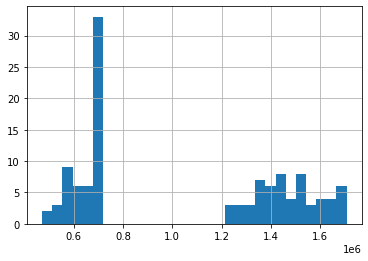

In [99]:
data.revenue.hist(bins = 30)
data.revenue.describe()

На гистограмме отчётливо видны две группы данных. Далее рассмотрим по отдельности каждое авианапраление

Рассмотрим перелёты в Белгород

In [100]:
#Перелёты в Белгород
data_ego = data[data.arrival_airport == 'EGO']
data_ego.describe()

,flight_id,flight_duration,aircraft_code,business_qty,economy_qty,econom_tickets,econom_amount,business_tickets,business_amount,price,total_amount,economy_prct,business_prct,seats,tickets,total_tickets,fuel_costs,revenue
count,59.000000,5.900000e+01,59.0,59.0,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.0,59.000000,59.000000,59.000000,59.000000
mean,136768.220339,8.300000e-01,1700.0,12.0,85.0,79.118644,501254.237288,11.067797,209181.355932,40541.847458,710435.593220,93.080758,92.231638,97.0,90.186441,92.975712,57204.546763,653231.046458
std,112.072801,1.119753e-15,0.0,0.0,0.0,7.054186,44699.368668,1.350152,25517.873888,947.849705,65835.266628,8.299043,11.251267,0.0,8.101670,8.352237,1337.415933,65818.530171
min,136571.000000,8.300000e-01,1700.0,12.0,85.0,54.000000,342000.000000,6.000000,113400.000000,39553.000000,531000.000000,63.529412,50.000000,97.0,64.000000,65.979381,55809.283000,472535.215000
25%,136663.500000,8.300000e-01,1700.0,12.0,85.0,75.500000,478350.000000,10.000000,189000.000000,39553.000000,667350.000000,88.823529,83.333333,97.0,86.500000,89.175258,55809.283000,610212.966000
50%,136769.000000,8.300000e-01,1700.0,12.0,85.0,83.000000,525900.000000,12.000000,226800.000000,41435.000000,746400.000000,97.647059,100.000000,97.0,95.000000,97.938144,58464.785000,690590.717000
75%,136859.000000,8.300000e-01,1700.0,12.0,85.0,85.000000,538500.000000,12.000000,226800.000000,41435.000000,765300.000000,100.000000,100.000000,97.0,97.000000,100.000000,58464.785000,706835.215000
max,136956.000000,8.300000e-01,1700.0,12.0,85.0,85.000000,538500.000000,12.000000,226800.000000,41435.000000,765300.000000,100.000000,100.000000,97.0,97.000000,100.000000,58464.785000,709490.717000


<AxesSubplot:>

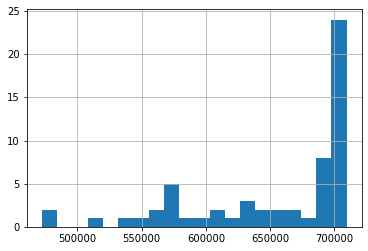

In [101]:
#Распределение рейсов по прибыльности
data_ego.revenue.hist(bins = 20)

<AxesSubplot:>

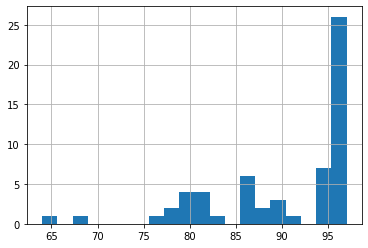

In [102]:
#Распределение рейсов по проданным билетам
data_ego.tickets.hist(bins = 20)

In [103]:
#Выведем дни с наименьшей прибылью, за ориентир возьмём 25% перцентиль
data_ego = data_ego[data_ego.revenue < data_ego.revenue.quantile(0.25)]
data_ego

,flight_id,flight_no,departure_airport,arrival_airport,actual_departure,flight_duration,aircraft_code,model,business_qty,economy_qty,...,day,price,total_amount,economy_prct,business_prct,seats,tickets,total_tickets,fuel_costs,revenue
1,136936,PG0480,AAQ,EGO,2017-01-02 09:28:00+00:00,0.83,1700,Sukhoi Superjet-100,12,85,...,понедельник,41435,632400.0,85.882353,75.000000,97,82.0,84.536082,58464.785,573935.215
2,136937,PG0480,AAQ,EGO,2017-01-03 09:29:00+00:00,0.83,1700,Sukhoi Superjet-100,12,85,...,вторник,41435,626100.0,84.705882,75.000000,97,81.0,83.505155,58464.785,567635.215
4,136645,PG0480,AAQ,EGO,2017-01-05 09:29:00+00:00,0.83,1700,Sukhoi Superjet-100,12,85,...,четверг,41435,633000.0,85.882353,75.000000,97,82.0,84.536082,58464.785,574535.215
7,136609,PG0480,AAQ,EGO,2017-01-08 09:28:00+00:00,0.83,1700,Sukhoi Superjet-100,12,85,...,воскресение,41435,639300.0,83.529412,83.333333,97,81.0,83.505155,58464.785,580835.215
19,136887,PG0480,AAQ,EGO,2017-01-20 09:30:00+00:00,0.83,1700,Sukhoi Superjet-100,12,85,...,пятница,41435,595200.0,82.352941,66.666667,97,78.0,80.412371,58464.785,536735.215
22,136767,PG0480,AAQ,EGO,2017-01-23 09:27:00+00:00,0.83,1700,Sukhoi Superjet-100,12,85,...,понедельник,41435,651300.0,85.882353,83.333333,97,83.0,85.567010,58464.785,592835.215
27,136678,PG0480,AAQ,EGO,2017-01-28 09:27:00+00:00,0.83,1700,Sukhoi Superjet-100,12,85,...,суббота,41435,631200.0,82.352941,83.333333,97,80.0,82.474227,58464.785,572735.215
29,136642,PG0480,AAQ,EGO,2017-01-30 09:28:00+00:00,0.83,1700,Sukhoi Superjet-100,12,85,...,понедельник,41435,531000.0,63.529412,83.333333,97,64.0,65.979381,58464.785,472535.215
35,136823,PG0480,AAQ,EGO,2017-02-05 09:27:00+00:00,0.83,1700,Sukhoi Superjet-100,12,85,...,воскресение,39553,620400.0,80.000000,83.333333,97,78.0,80.412371,55809.283,564590.717
39,136666,PG0480,AAQ,EGO,2017-02-09 09:26:00+00:00,0.83,1700,Sukhoi Superjet-100,12,85,...,четверг,39553,664500.0,91.764706,75.000000,97,87.0,89.690722,55809.283,608690.717


<AxesSubplot:xlabel='actual_departure'>

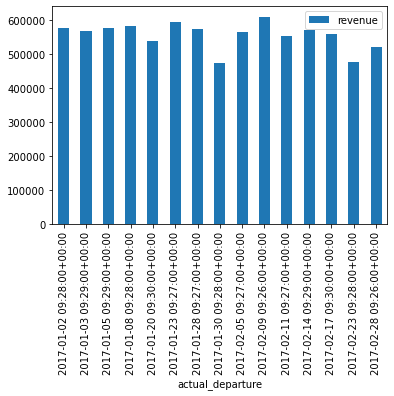

In [104]:
#Выведем данные по прибыли в графической форме по дням
data_ego.pivot_table(
values = ['revenue'],
index = 'actual_departure').plot(kind = 'bar')

<AxesSubplot:xlabel='day'>

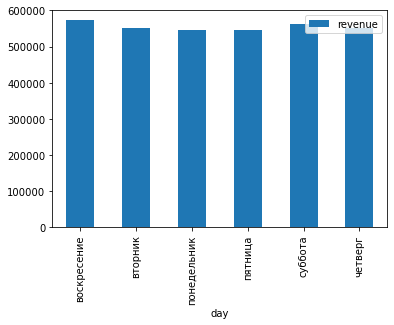

In [105]:
#А также проверим, есть ли зависимость от дня недели
data_ego.pivot_table(
values = ['revenue'],
index = 'day',
aggfunc = 'mean').plot(kind = 'bar')

<AxesSubplot:xlabel='actual_departure'>

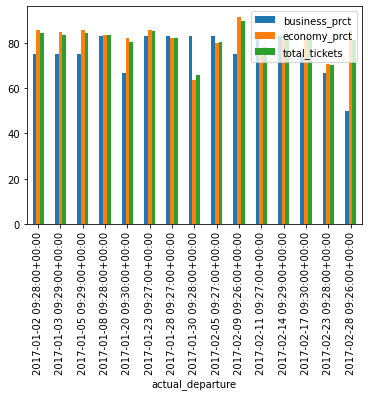

In [106]:
#Выведем данные по заполняемости салона самолёта по дням в %
data_ego.pivot_table(
values = ['economy_prct', 'business_prct', 'total_tickets'],
index = 'actual_departure').plot(kind = 'bar')

<AxesSubplot:xlabel='day'>

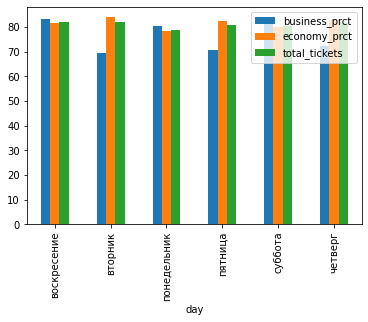

In [107]:
#А также проверим, есть ли зависимость от дня недели
data_ego.pivot_table(
values = ['economy_prct', 'business_prct', 'total_tickets'],
index = 'day',
aggfunc = 'mean').plot(kind = 'bar')

## Вывод
Перелёты в Белгород зачастую проходят при полной загрузке, что видно на гистограммах распределения. В среднем, день недели не сильно влияет на прибыль (заметна небольшая просадка по понедельникам и пятницам). Наибольшее влияние показывает конкретная дата, стоит обратить внимание на 30.01, 23.02, 28.02.
Очевидно, что это конец текущего месяца или праздничный день.

Рассмотрим перелёты в Новокузнецк

In [108]:
#Перелёты в Новокузнецк
data_noz = data[data.arrival_airport == 'NOZ']
display(data_noz)
data_noz.describe()

,flight_id,flight_no,departure_airport,arrival_airport,actual_departure,flight_duration,aircraft_code,model,business_qty,economy_qty,...,day,price,total_amount,economy_prct,business_prct,seats,tickets,total_tickets,fuel_costs,revenue
59,136546,PG0194,AAQ,NOZ,2017-01-03 06:13:00+00:00,5.08,2600,Boeing 737-300,12,118,...,вторник,41435,NaN,NaN,NaN,130,NaN,NaN,547273.480,NaN
60,136523,PG0194,AAQ,NOZ,2017-01-10 06:14:00+00:00,5.08,2600,Boeing 737-300,12,118,...,вторник,41435,NaN,NaN,NaN,130,NaN,NaN,547273.480,NaN
61,136540,PG0194,AAQ,NOZ,2017-01-17 06:14:00+00:00,5.08,2600,Boeing 737-300,12,118,...,вторник,41435,NaN,NaN,NaN,130,NaN,NaN,547273.480,NaN
62,136560,PG0194,AAQ,NOZ,2017-01-24 06:13:00+00:00,5.08,2600,Boeing 737-300,12,118,...,вторник,41435,NaN,NaN,NaN,130,NaN,NaN,547273.480,NaN
63,136544,PG0194,AAQ,NOZ,2017-01-31 06:10:00+00:00,5.08,2600,Boeing 737-300,12,118,...,вторник,41435,NaN,NaN,NaN,130,NaN,NaN,547273.480,NaN
64,136514,PG0194,AAQ,NOZ,2017-02-07 06:14:00+00:00,5.08,2600,Boeing 737-300,12,118,...,вторник,39553,NaN,NaN,NaN,130,NaN,NaN,522416.024,NaN
65,136567,PG0194,AAQ,NOZ,2017-02-14 06:12:00+00:00,5.08,2600,Boeing 737-300,12,118,...,вторник,39553,NaN,NaN,NaN,130,NaN,NaN,522416.024,NaN
66,136511,PG0194,AAQ,NOZ,2017-02-21 06:15:00+00:00,5.08,2600,Boeing 737-300,12,118,...,вторник,39553,NaN,NaN,NaN,130,NaN,NaN,522416.024,NaN
67,136513,PG0194,AAQ,NOZ,2017-02-28 06:13:00+00:00,5.08,2600,Boeing 737-300,12,118,...,вторник,39553,NaN,NaN,NaN,130,NaN,NaN,522416.024,NaN


,flight_id,flight_duration,aircraft_code,business_qty,economy_qty,econom_tickets,econom_amount,business_tickets,business_amount,price,total_amount,economy_prct,business_prct,seats,tickets,total_tickets,fuel_costs,revenue
count,9.000000,9.000000e+00,9.0,9.0,9.0,0.0,0.0,0.0,0.0,9.000000,0.0,0.0,0.0,9.0,0.0,0.0,9.000000,0.0
mean,136535.333333,5.080000e+00,2600.0,12.0,118.0,NaN,NaN,NaN,NaN,40598.555556,NaN,NaN,NaN,130.0,NaN,NaN,536225.721778,NaN
std,20.976177,9.420555e-16,0.0,0.0,0.0,NaN,NaN,NaN,NaN,991.901093,NaN,NaN,NaN,0.0,NaN,NaN,13101.029633,NaN
min,136511.000000,5.080000e+00,2600.0,12.0,118.0,NaN,NaN,NaN,NaN,39553.000000,NaN,NaN,NaN,130.0,NaN,NaN,522416.024000,NaN
25%,136514.000000,5.080000e+00,2600.0,12.0,118.0,NaN,NaN,NaN,NaN,39553.000000,NaN,NaN,NaN,130.0,NaN,NaN,522416.024000,NaN
50%,136540.000000,5.080000e+00,2600.0,12.0,118.0,NaN,NaN,NaN,NaN,41435.000000,NaN,NaN,NaN,130.0,NaN,NaN,547273.480000,NaN
75%,136546.000000,5.080000e+00,2600.0,12.0,118.0,NaN,NaN,NaN,NaN,41435.000000,NaN,NaN,NaN,130.0,NaN,NaN,547273.480000,NaN
max,136567.000000,5.080000e+00,2600.0,12.0,118.0,NaN,NaN,NaN,NaN,41435.000000,NaN,NaN,NaN,130.0,NaN,NaN,547273.480000,NaN


## Вывод
Отсутствуют данные о количестве проданных билетов и вырученных средствах с продажи. придётся исключить эти данные из дальнейшего анализа

Рассмотрим перелёты в Москву

In [109]:
#Перелёты в Москву
data_svo = data[data.arrival_airport == 'SVO']
data_svo.describe()

,flight_id,flight_duration,aircraft_code,business_qty,economy_qty,econom_tickets,econom_amount,business_tickets,business_amount,price,total_amount,economy_prct,business_prct,seats,tickets,total_tickets,fuel_costs,revenue
count,59.000000,5.900000e+01,59.0,59.0,59.0,59.000000,5.900000e+01,59.000000,59.000000,59.000000,5.900000e+01,59.000000,59.000000,59.0,59.000000,59.000000,59.000000,5.900000e+01
mean,136298.661017,1.670000e+00,2600.0,12.0,118.0,102.610169,1.257966e+06,10.508475,384610.169492,40541.847458,1.642576e+06,86.957771,87.570621,130.0,113.118644,87.014342,176032.701661,1.466544e+06
std,117.208716,1.343704e-15,0.0,0.0,0.0,8.155846,1.000073e+05,1.394235,51029.017083,947.849705,1.318786e+05,6.911734,11.618629,0.0,8.896115,6.843165,4115.563417,1.315635e+05
min,136119.000000,1.670000e+00,2600.0,12.0,118.0,86.000000,1.052800e+06,6.000000,219600.000000,39553.000000,1.398000e+06,72.881356,50.000000,130.0,97.000000,74.615385,171739.126000,1.218089e+06
25%,136193.500000,1.670000e+00,2600.0,12.0,118.0,98.000000,1.200400e+06,10.000000,366000.000000,39553.000000,1.543200e+06,83.050847,83.333333,130.0,107.000000,82.307692,171739.126000,1.367375e+06
50%,136284.000000,1.670000e+00,2600.0,12.0,118.0,102.000000,1.249200e+06,11.000000,402600.000000,41435.000000,1.628600e+06,86.440678,91.666667,130.0,112.000000,86.153846,179910.770000,1.456861e+06
75%,136407.000000,1.670000e+00,2600.0,12.0,118.0,108.000000,1.324200e+06,11.500000,420900.000000,41435.000000,1.738400e+06,91.525424,95.833333,130.0,120.000000,92.307692,179910.770000,1.562575e+06
max,136486.000000,1.670000e+00,2600.0,12.0,118.0,118.000000,1.446800e+06,12.000000,439200.000000,41435.000000,1.886000e+06,100.000000,100.000000,130.0,130.000000,100.000000,179910.770000,1.706089e+06


In [39]:
data_svo

,flight_id,flight_no,departure_airport,arrival_airport,actual_departure,flight_duration,aircraft_code,model,business_qty,economy_qty,...,day,price,total_amount,economy_prct,business_prct,seats,tickets,total_tickets,fuel_costs,revenue
68,136420,PG0252,AAQ,SVO,2017-01-01 10:09:00+00:00,1.67,2600,Boeing 737-300,12,118,...,воскресение,41435,1542000.0,78.813559,91.666667,130,104.0,80.000000,179910.770,1362089.230
69,136458,PG0252,AAQ,SVO,2017-01-02 10:07:00+00:00,1.67,2600,Boeing 737-300,12,118,...,понедельник,41435,1568800.0,85.593220,75.000000,130,110.0,84.615385,179910.770,1388889.230
70,136119,PG0252,AAQ,SVO,2017-01-03 10:08:00+00:00,1.67,2600,Boeing 737-300,12,118,...,вторник,41435,1653000.0,86.440678,91.666667,130,113.0,86.923077,179910.770,1473089.230
71,136159,PG0252,AAQ,SVO,2017-01-04 10:07:00+00:00,1.67,2600,Boeing 737-300,12,118,...,среда,41435,1700600.0,87.288136,100.000000,130,115.0,88.461538,179910.770,1520689.230
72,136202,PG0252,AAQ,SVO,2017-01-05 10:07:00+00:00,1.67,2600,Boeing 737-300,12,118,...,четверг,41435,1495600.0,75.423729,91.666667,130,100.0,76.923077,179910.770,1315689.230
73,136209,PG0252,AAQ,SVO,2017-01-06 10:09:00+00:00,1.67,2600,Boeing 737-300,12,118,...,пятница,41435,1615200.0,86.440678,83.333333,130,112.0,86.153846,179910.770,1435289.230
74,136164,PG0252,AAQ,SVO,2017-01-07 10:07:00+00:00,1.67,2600,Boeing 737-300,12,118,...,суббота,41435,1738400.0,92.372881,91.666667,130,120.0,92.307692,179910.770,1558489.230
75,136122,PG0252,AAQ,SVO,2017-01-08 10:08:00+00:00,1.67,2600,Boeing 737-300,12,118,...,воскресение,41435,1431000.0,73.728814,83.333333,130,97.0,74.615385,179910.770,1251089.230
76,136464,PG0252,AAQ,SVO,2017-01-09 10:07:00+00:00,1.67,2600,Boeing 737-300,12,118,...,понедельник,41435,1398000.0,78.813559,58.333333,130,100.0,76.923077,179910.770,1218089.230
77,136423,PG0252,AAQ,SVO,2017-01-10 10:12:00+00:00,1.67,2600,Boeing 737-300,12,118,...,вторник,41435,1849400.0,100.000000,91.666667,130,129.0,99.230769,179910.770,1669489.230


<AxesSubplot:>

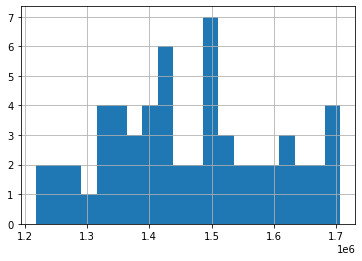

In [110]:
#Распределение рейсов по прибыльности
data_svo.revenue.hist(bins = 20)

<AxesSubplot:>

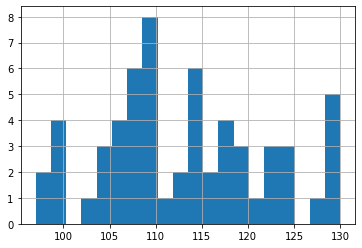

In [111]:
#Распределение рейсов по проданным билетам
data_svo.tickets.hist(bins = 20)

In [112]:
#Выведем дни с наименьшей прибылью, за ориентир возьмём 25% перцентиль
data_svo = data_svo[data_svo.revenue < data_svo.revenue.quantile(0.25)]
data_svo

,flight_id,flight_no,departure_airport,arrival_airport,actual_departure,flight_duration,aircraft_code,model,business_qty,economy_qty,...,day,price,total_amount,economy_prct,business_prct,seats,tickets,total_tickets,fuel_costs,revenue
68,136420,PG0252,AAQ,SVO,2017-01-01 10:09:00+00:00,1.67,2600,Boeing 737-300,12,118,...,воскресение,41435,1542000.0,78.813559,91.666667,130,104.0,80.000000,179910.770,1362089.230
72,136202,PG0252,AAQ,SVO,2017-01-05 10:07:00+00:00,1.67,2600,Boeing 737-300,12,118,...,четверг,41435,1495600.0,75.423729,91.666667,130,100.0,76.923077,179910.770,1315689.230
75,136122,PG0252,AAQ,SVO,2017-01-08 10:08:00+00:00,1.67,2600,Boeing 737-300,12,118,...,воскресение,41435,1431000.0,73.728814,83.333333,130,97.0,74.615385,179910.770,1251089.230
76,136464,PG0252,AAQ,SVO,2017-01-09 10:07:00+00:00,1.67,2600,Boeing 737-300,12,118,...,понедельник,41435,1398000.0,78.813559,58.333333,130,100.0,76.923077,179910.770,1218089.230
78,136366,PG0252,AAQ,SVO,2017-01-11 10:08:00+00:00,1.67,2600,Boeing 737-300,12,118,...,среда,41435,1527400.0,77.966102,91.666667,130,103.0,79.230769,179910.770,1347489.230
81,136185,PG0252,AAQ,SVO,2017-01-14 10:06:00+00:00,1.67,2600,Boeing 737-300,12,118,...,суббота,41435,1520000.0,79.661017,83.333333,130,104.0,80.000000,179910.770,1340089.230
83,136282,PG0252,AAQ,SVO,2017-01-16 10:07:00+00:00,1.67,2600,Boeing 737-300,12,118,...,понедельник,41435,1518800.0,82.203390,75.000000,130,106.0,81.538462,179910.770,1338889.230
91,136345,PG0252,AAQ,SVO,2017-01-24 13:32:00+00:00,1.67,2600,Boeing 737-300,12,118,...,вторник,41435,1517600.0,84.745763,66.666667,130,108.0,83.076923,179910.770,1337689.230
92,136383,PG0252,AAQ,SVO,2017-01-25 10:09:00+00:00,1.67,2600,Boeing 737-300,12,118,...,среда,41435,1493200.0,83.050847,66.666667,130,106.0,81.538462,179910.770,1313289.230
94,136485,PG0252,AAQ,SVO,2017-01-27 10:07:00+00:00,1.67,2600,Boeing 737-300,12,118,...,пятница,41435,1520000.0,82.203390,75.000000,130,106.0,81.538462,179910.770,1340089.230


<AxesSubplot:xlabel='actual_departure'>

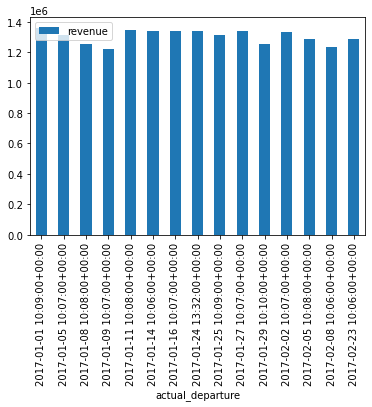

In [113]:
#Выведем данные по прибыли в графической форме по дням
data_svo.pivot_table(
values = ['revenue'],
index = 'actual_departure').plot(kind = 'bar')

<AxesSubplot:xlabel='day'>

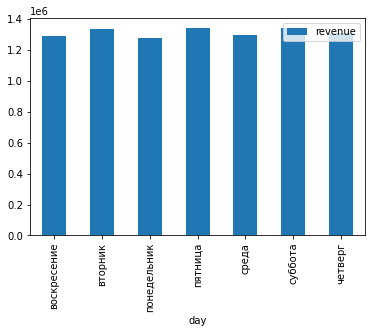

In [114]:
#А также проверим, есть ли зависимость от дня недели
data_svo.pivot_table(
values = ['revenue'],
index = 'day',
aggfunc = 'mean').plot(kind = 'bar')

<AxesSubplot:xlabel='actual_departure'>

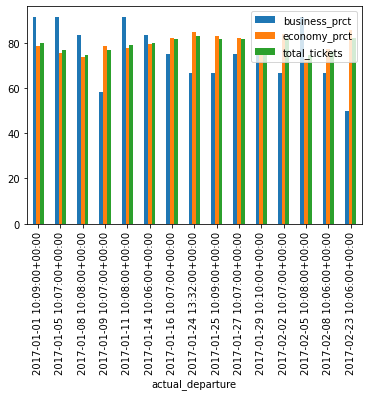

In [115]:
#Выведем данные по заполняемости салона самолёта по дням
data_svo.pivot_table(
values = ['economy_prct', 'business_prct', 'total_tickets'],
index = 'actual_departure').plot(kind = 'bar')

<AxesSubplot:xlabel='day'>

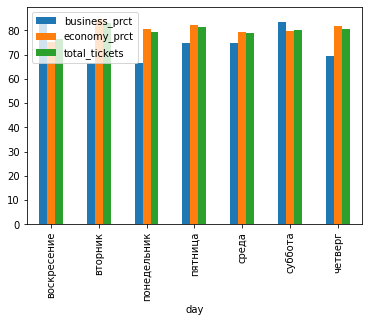

In [116]:
#А также проверим, есть ли зависимость от дня недели
data_svo.pivot_table(
values = ['economy_prct', 'business_prct', 'total_tickets'],
index = 'day',
aggfunc = 'mean').plot(kind = 'bar')

## Вывод:
В отличии от авиаиаперелёта в Белгород, с направлением на Москву не всё так однозначно. На рейс выходит Boeing 737-300. Как видно по гистограмме распределения, количество пассажиров в среднем 112, при максимально возможной загрузке в 130. К тому же неравномерно заполнение бизнес-класса. Стоит обратить внимание на 08.01, 09.01 (это конец новогодних каникул), а также 29.01, 08.02 и 23.02. Это дни с максимальной просадкой прибыли.